In [395]:
import cmdstanpy
import pandas as pd
import numpy as np
from cmdstanpy import cmdstan_path, CmdStanModel
import random
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import json
import scipy.stats as stats
import patsy

MODEL_PATH = 'time_model_2.stan'

sns.set_style("darkgrid", {"axes.facecolor": ".9"})

In [17]:
temps = pd.read_csv('data/Hyperlocal_Temperature_Monitoring.csv')
temps.head()

,Sensor.ID,AirTemp,Day,Hour,Latitude,Longitude,Year,Install.Type,Borough,ntacode
0,Bk-BR_01,71.189000,06/15/2018,1,40.666205,-73.91691,2018,Street Tree,Brooklyn,BK81
1,Bk-BR_01,70.243333,06/15/2018,2,40.666205,-73.91691,2018,Street Tree,Brooklyn,BK81
2,Bk-BR_01,69.392667,06/15/2018,3,40.666205,-73.91691,2018,Street Tree,Brooklyn,BK81
3,Bk-BR_01,68.263167,06/15/2018,4,40.666205,-73.91691,2018,Street Tree,Brooklyn,BK81
4,Bk-BR_01,67.114000,06/15/2018,5,40.666205,-73.91691,2018,Street Tree,Brooklyn,BK81


In [537]:
covariates = pd.read_csv('data/temp3.csv').round(8)
covariates2 = pd.read_csv('data/temp_1.csv').round(8)
covariates = covariates.merge(covariates2)
covariates['mean_fa_ratio'] = covariates['mean_fa_ratio'].fillna(0)
temps = temps.drop(index=np.where(temps['AirTemp'].isna())[0])
data = temps.merge(covariates, how='outer', on=['Latitude','Longitude'])

In [538]:
data

,Sensor.ID,AirTemp,Day,Hour,Latitude,Longitude,Year,Install.Type,Borough,ntacode,num_build500,mean_fa_ratio,min_distance_park,num_trees_50m
0,Bk-BR_01,71.189000,06/15/2018,1,40.666205,-73.91691,2018,Street Tree,Brooklyn,BK81,30,1.430347,638.624047,2
1,Bk-BR_01,70.243333,06/15/2018,2,40.666205,-73.91691,2018,Street Tree,Brooklyn,BK81,30,1.430347,638.624047,2
2,Bk-BR_01,69.392667,06/15/2018,3,40.666205,-73.91691,2018,Street Tree,Brooklyn,BK81,30,1.430347,638.624047,2
3,Bk-BR_01,68.263167,06/15/2018,4,40.666205,-73.91691,2018,Street Tree,Brooklyn,BK81,30,1.430347,638.624047,2
4,Bk-BR_01,67.114000,06/15/2018,5,40.666205,-73.91691,2018,Street Tree,Brooklyn,BK81,30,1.430347,638.624047,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2085438,Q-CH_26,78.346667,09/07/2019,15,40.699578,-73.73876,2019,Light Pole,Queens,QN33,28,1.319975,1255.416584,0
2085439,Q-CH_26,79.517167,09/07/2019,16,40.699578,-73.73876,2019,Light Pole,Queens,QN33,28,1.319975,1255.416584,0
2085440,Q-CH_26,77.203667,09/07/2019,17,40.699578,-73.73876,2019,Light Pole,Queens,QN33,28,1.319975,1255.416584,0
2085441,Q-CH_26,75.696000,09/07/2019,18,40.699578,-73.73876,2019,Light Pole,Queens,QN33,28,1.319975,1255.416584,0


In [539]:
data['month'] = pd.to_datetime(data['Day']).dt.month

In [540]:
data = pd.get_dummies(data,columns=['month'])

In [541]:
g = data.groupby(['Sensor.ID','Day'])

In [601]:
H = 24
K = 4
N = len(g.indices)

y = []#np.zeros([N,H])
X = []#np.zeros([N,K])
# INVESTIGATE DATA
i = 0

for k,_ in tqdm(g.indices.items()):
    sub_group = g.get_group(k)
    if sub_group['AirTemp'].shape[0] == H:
        y.append(sub_group['AirTemp'])
        covariates = sub_group[['num_build500','mean_fa_ratio','min_distance_park','num_trees_50m','month_6','month_7','month_8', 'month_9','month_10']].iloc[0].values
        X.append(covariates)

y = np.array(y)
X = np.array(X)

100%|██████████████████████████████████████████████| 87029/87029 [02:03<00:00, 705.64it/s]


In [599]:
H = 24
K = 4
N = len(g.indices)

y = []#np.zeros([N,H])
X = []#np.zeros([N,K])
# INVESTIGATE DATA
i = 0
g = data.groupby(['Sensor.ID'])
for k,_ in tqdm(g.indices.items()):
    sub_group = g.get_group(k)
    for 
        
    y.append(np.mean())
    covariates = sub_group[['num_build500','mean_fa_ratio','min_distance_park','num_trees_50m']].iloc[0].values
    print(covariates)
    break
#         X.append(covariates)

# y = np.array(y)
# X = np.array(X)

  0%|                                                   | 2/87029 [00:00<25:45, 56.31it/s]

[ 30.           1.43034721 638.62404674   2.        ]


In [587]:
data

,Sensor.ID,AirTemp,Day,Hour,Latitude,Longitude,Year,Install.Type,Borough,ntacode,num_build500,mean_fa_ratio,min_distance_park,num_trees_50m,month_6,month_7,month_8,month_9,month_10
0,Bk-BR_01,71.189000,06/15/2018,1,40.666205,-73.91691,2018,Street Tree,Brooklyn,BK81,30,1.430347,638.624047,2,1,0,0,0,0
1,Bk-BR_01,70.243333,06/15/2018,2,40.666205,-73.91691,2018,Street Tree,Brooklyn,BK81,30,1.430347,638.624047,2,1,0,0,0,0
2,Bk-BR_01,69.392667,06/15/2018,3,40.666205,-73.91691,2018,Street Tree,Brooklyn,BK81,30,1.430347,638.624047,2,1,0,0,0,0
3,Bk-BR_01,68.263167,06/15/2018,4,40.666205,-73.91691,2018,Street Tree,Brooklyn,BK81,30,1.430347,638.624047,2,1,0,0,0,0
4,Bk-BR_01,67.114000,06/15/2018,5,40.666205,-73.91691,2018,Street Tree,Brooklyn,BK81,30,1.430347,638.624047,2,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2085438,Q-CH_26,78.346667,09/07/2019,15,40.699578,-73.73876,2019,Light Pole,Queens,QN33,28,1.319975,1255.416584,0,0,0,0,1,0
2085439,Q-CH_26,79.517167,09/07/2019,16,40.699578,-73.73876,2019,Light Pole,Queens,QN33,28,1.319975,1255.416584,0,0,0,0,1,0
2085440,Q-CH_26,77.203667,09/07/2019,17,40.699578,-73.73876,2019,Light Pole,Queens,QN33,28,1.319975,1255.416584,0,0,0,0,1,0
2085441,Q-CH_26,75.696000,09/07/2019,18,40.699578,-73.73876,2019,Light Pole,Queens,QN33,28,1.319975,1255.416584,0,0,0,0,1,0


In [602]:
X

array([[3.00000000e+01, 1.43034721e+00, 6.38624047e+02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.00000000e+01, 1.43034721e+00, 6.38624047e+02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.00000000e+01, 1.43034721e+00, 6.38624047e+02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [8.00000000e+00, 8.67229740e-01, 2.91008311e+03, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [8.00000000e+00, 8.67229740e-01, 2.91008311e+03, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [8.00000000e+00, 8.67229740e-01, 2.91008311e+03, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00]])

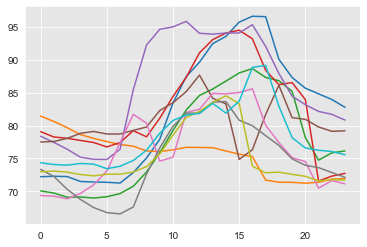

In [594]:
l = random.sample(list(np.where(X[:,6])[0]),10)
for i in l:
    sns.lineplot(x=range(24),y=y[i,:])

In [592]:
N = y.shape[0]
X_new_size = 5000
K = X.shape[1]
# X_size = N - X_new_size
X_size = 1
shuff_idx = random.shuffle(list(range(N)))
shuff_y, shuff_X = y[shuff_idx,:][0], X[shuff_idx,:][0]
beta_mean = np.random.normal(size=X.shape[1])
beta_sd = np.random.uniform(size=X.shape[1])

In [578]:
d = {'N': N, 'M': X_size, 'H': H, 'K': K, 'X': shuff_X, 'y': shuff_y,'beta_mean': beta_mean,'beta_sd': beta_sd,'y_cov':shuff_y[:X_size,:].T}

In [579]:
model = CmdStanModel(stan_file=MODEL_PATH)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:compiled model file: /Users/sotiriskaragounis/git/UHInyc/time_model_2


In [580]:
bern_vb = model.variational(data=d,require_converged=False)

INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
Proceeding because require_converged is set to False


## MCMC

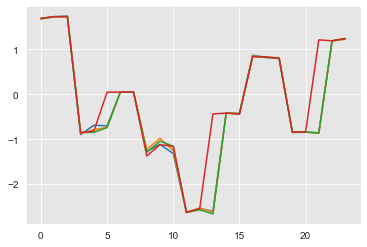

In [581]:
b = bern_vb.stan_variable(var='beta')
for i in range(4):
    sns.lineplot(x=range(24),y=b[:,i])

In [582]:
y_sims = bern_vb.stan_variable(var='y_rep')
b = bern_vb.stan_variable(var='beta')

<AxesSubplot:>

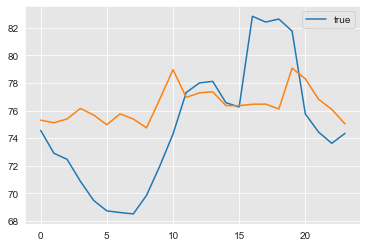

In [585]:
sns.lineplot(x=range(24),y=shuff_y[1,:],label='true')
sns.lineplot(x=range(24),y=y_sims[0,:])

<AxesSubplot:>

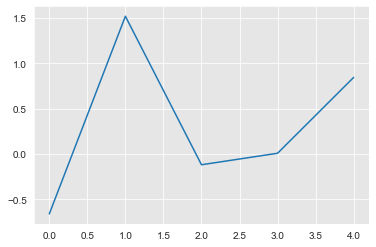

In [238]:
mu = np.zeros(5)
cov = np.eye(5)
r = np.random.multivariate_normal(mu,cov) 
sns.lineplot(x=range(5),y=r)

<AxesSubplot:>

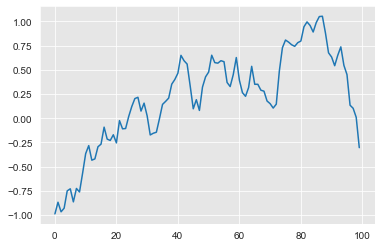

In [313]:
n = 100
mu = np.zeros(n)
cov = np.eye(n)

cov = cov_off_axis(n,cov)
cov = cov_exp(n,mu,cov)

r = np.random.multivariate_normal(mu,cov) 
sns.lineplot(x=range(n),y=r[:])

In [311]:
def cov_off_axis(n,cov):
    for i in range(n):
        if i != n - 1:
            cov[i,i+1] = .5
        if i != 0:
            cov[i,i-1] = .5
    return cov
        
def cov_exp(n,mu,cov):
    l = list(range(n))
    for i in range(n):
        for j in range(n):
            cov[i,j] = np.exp(-(np.abs(l[i] - l[j]))*1/n)
    return cov

<AxesSubplot:>

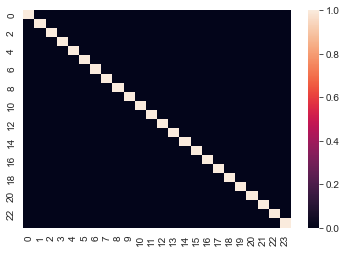

In [575]:
cov = bern_vb.stan_variable(var='Sigma')
sns.heatmap(cov)